<a href="https://colab.research.google.com/github/NguyenBinhHCMUS/practice/blob/master/Binh_Nguyen_%5BProtonX%5D_Part_1_Linear_Regresison_%5BPython%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment: Linear Regresison [Part 1 - Python]

```
ProtonX - TensorFlow Class
```

> **MỤC TIÊU:** Trong phần hướng dẫn này, các bạn sẽ thực hiện dự đoán  **giá nhà** từ **diện tích nhà** và **số lượng phòng ngủ**.

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3.
- Cố gắng không sử dụng các vòng lặp (for, while). 
- Hãy sử dụng các hàm của thư viện numpy.
- Chúng ta cũng sẽ sử dụng thư viện __scikit-learn__ để kiểm tra kết quả
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới. 

Các bạn sẽ bắt đầu Code trong phần `### START CODE HERE ###` và `### END CODE HERE ###`. Các bạn nhớ đừng sửa bất kỳ dòng Code nào bên ngoài những câu lệnh này. 

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó. 

Trong phần Code: các bạn hãy cố gắng thực hiện ít dòng Code nhất theo chỉ định "(≈ X lines of code)". Mặc dù đây không phải là hạn chế về số dòng Code của bạn, nhưng hãy tối ưu sao cho ít nhất có thể.

In [1]:
# import các thư viện 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set_style("whitegrid")

## Nhập dữ liệu và trực quan hoá 

In [2]:
!wget --no-check-certificate \
https://www.dropbox.com/s/gm1uc37y8a6croz/data.zip \
-O /tmp/data.zip

--2020-10-06 09:06:55--  https://www.dropbox.com/s/gm1uc37y8a6croz/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gm1uc37y8a6croz/data.zip [following]
--2020-10-06 09:06:55--  https://www.dropbox.com/s/raw/gm1uc37y8a6croz/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucebb71415891cae3adc7ee21bad.dl.dropboxusercontent.com/cd/0/inline/BAuhyMvgehHLncO7xZ2NAfOTWoYQYvldTb9LpsTJgIe40RHZn4OzGN-awLiozTbHewyCKyS49xmVKE4Nz0w6TFsfulJDrsm-tGVq-Q-VodbJ_1viDkovVBh_Xz4RJ7J_h3M/file# [following]
--2020-10-06 09:06:56--  https://ucebb71415891cae3adc7ee21bad.dl.dropboxusercontent.com/cd/0/inline/BAuhyMvgehHLncO7xZ2NAfOTWoYQYvldTb9LpsTJgIe40RHZn4OzGN-awLiozTbHewyCKyS49xmVKE4Nz0w6TFsfulJDrsm-tGVq-Q-VodbJ_1viDkovVBh_Xz4RJ7

Giải nén dữ liệu tải xuống !

In [3]:
import os
import zipfile

local_zip = '/tmp/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

%cd "/tmp"

/tmp


In [4]:
# đọc dữ liệu từ file data.txt 
data = np.loadtxt('data/data.txt', delimiter=',')
x, y = data[:, :2], data[:, 2]

In [5]:
# xem trước 5 dữ liệu đầu tiên
print(x[:5])
print(y[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]


## 1. Trực quan hoá dữ liệu

Việc trực quan hoá dữ liệu sẽ phần nào giúp chúng ta hình dung bộ dữ liệu ra sao.

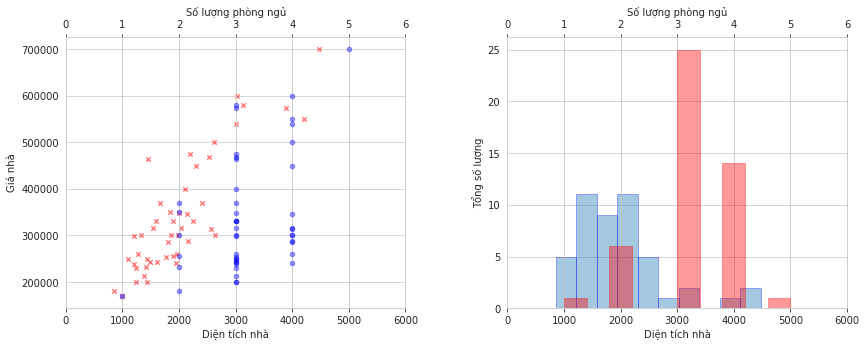

In [6]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Diện tích nhà')
ax1.set_ylabel('Giá nhà')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Số lượng phòng ngủ')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Diện tích nhà')
ax2.set_ylabel('Tổng số lượng')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Số lượng phòng ngủ')
ax4.set_xlim(0, 6);

## 2. Chuẩn hoá dữ liệu 

### Bài tập 1: Chuẩn hoá dữ liệu 

Nhắc lại: Standardization (còn được gọi là z-score normalization) biến đổi dữ liệu sao cho phân phối của kết quả có giá trị trung bình ($\mu$) bằng 0 và độ lệch chuẩn ($\sigma$) bằng 1. Khi đó, công thức chuẩn hoá là:

<center> $x' = \frac{x - x_{mean}}{\sigma}$ </center>

Trong đó:
- $x'$: giá trị sau chuẩn hoá.
- $x$: giá trị ban đầu.
- $x_{mean}$: giá trị mean của bộ dữ liệu.
- $\sigma$: phương sai (standard deviation).

Công thức z-score trong thống kê được định nghĩa:

<center> $x' = \frac{x - \mu}{\sigma}$ </center>

```python
Gợi ý sử dụng:
  - numpy.mean(): tính giá trị trung bình
  - numpy.std(): tính phương sai 

Chú ý: chuẩn hoá theo từng feature.
  - axis = 0: xử lý theo cột 
  - axis = 1: xử lý theo hàng 
```

In [7]:
# Khi làm việc với matrix bạn cần chú ý tới axis 

def featureNormalize(X):
    """
    mu: giá trị mean
    sigma: phương sai (standard deviation)
    X_norm: giá trị sau chuẩn hoá
    """
    ### START CODE HERE ### (≈ 3 line of code)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    ### END CODE HERE ###
    
    return X_norm, mu, sigma

Chuẩn hoá dữ liệu Training:

In [8]:
# In dữ liệu trước khi chuẩn hoá
print(x[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [9]:
# Chuẩn hoá dữ liệu 
X, mean, sigma = featureNormalize(x)

In [10]:
# Dữ liệu sau khi chuẩn hoá
print(X[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


**Đầu ra kỳ vọng**: 
```python
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]
```

Trực quan hoá dữ liệu sau khi chuẩn hoá

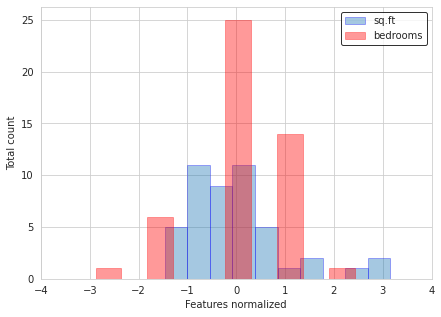

In [11]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

## 3. Gradient Descent

### Bài tập 2: Thực hiện thêm cột 1 vào X

Để thuận tiện cho việc tính toán, chúng ta coi $\theta_0 \times x_0$ với $x_0 = 1$. Khi đó:

<br><center> $\hat{y} = h_{\theta}(x) = \theta_0{x_0} + \theta_1{x_1} + \theta_2{x_2} + \theta_3{x_3} + ... +    \theta_n{x_n}$</center>

**Chú ý:** $x_0 = 1$


>$ X = \begin{bmatrix}
 1 & x_1 ^{(1)} & \cdots \\ 
 1 & x_1^{(2)} & \cdots \\ 
 1 & x_1^{(3)} & \cdots 
\end{bmatrix}; \theta = \begin{bmatrix}
\theta_0\\ 
\theta_1\\
\vdots
\end{bmatrix} $

In [12]:
"""
Gợi ý sử dụng: np.ones và np.hstack
"""

### START CODE HERE ### (≈ 1 line of code)
X = np.hstack((np.ones((X.shape[0], 1)), X))
### END CODE HERE ###

In [13]:
print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


**Đầu ra kỳ vọng**: 
```Python 
[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
```

Khởi tạo tham số:

In [14]:
# Theta 
np.random.seed(9999)
theta = np.random.random(3)

# Số lượng vòng lặp 
iterations = 1500

# Learning_rate 
alpha = 0.01

## Tính Cost Function J



### Bài tập 3: Tính Cost Function J

<br><center>$J(\theta) = \dfrac{1}{2m}  \sum_{i = 1}^{m} {(h_{\theta}(x^{(i)}) - y^{(i)})^2}$</center>

Hoặc sử dụng Vector hoá:

<br><center>$J(\theta) = \dfrac{1}{2m} (X\theta - \vec{y} )^T(X\theta - \vec{y})$</center>

*Chú ý:* phép nhân Vector.

In [15]:
def computeCost(X, y, theta):
    m = len(y)
    
    ### START CODE HERE ### (≈ 1 line of code)   
    cost = 1 / (2*m) * np.sum((X.dot(theta) - y)**2)
    ### END CODE HERE ###    
    
    return np.squeeze(cost)

In [16]:
computeCost(X, y, theta)

65591242973.23542

**Đầu ra kỳ vọng**: 
```python
65591092105.466644
```
Giá trị lớn do ta đang để giá trị `y` lớn, tuy nhiên không ảnh hưởng đến việc train (bạn có thể scale y xuống đoạn [0, 1]).

Mục đích để nguyên giá trị của `y` để mình sẽ so sánh `theta` tìm được bằng Gradient Descent với thư viện Skit-learn.

### Bài tập 4: Định nghĩa hàm Gradient Descent

> $\theta:= \theta - \frac{\alpha}{m} X^T (X\theta - \vec{y}) $


In [17]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    lossHist = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        
        ### START CODE HERE ### (≈ 1 line of code)
        thetaMod -= alpha/m * X.T.dot(X.dot(thetaMod) - y)
        ### END CODE HERE ### 
        
        thetaHist[i] = thetaMod[1]
        lossHist[i] = computeCost(X, y, thetaMod)
    
    return thetaMod, thetaHist, lossHist

In [18]:
gradient, thetaHist, lossHist = gradientDescent(X, y, theta, alpha, iterations)  
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(gradient[0], gradient[1], gradient[2]))

theta[0]: 340412.56301462563
theta[1]: 109370.05683004878
theta[2]: -6500.615220455424


**Đầu ra kỳ vọng**: 
```python
theta[0]: 340412.5630146717
theta[1]: 109370.05694831036
theta[2]: -6500.615338716937
```

Vẽ đồ thị hàm mất mát (loss):

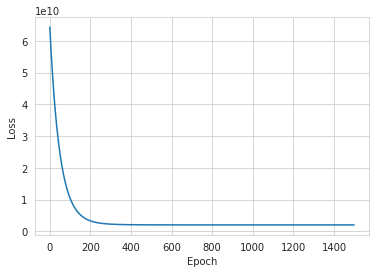

In [19]:
plt.figure()
plt.plot(lossHist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Nghiệm với Scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

model = reg.fit(x, y)

print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(model.intercept_, model.coef_[0], model.coef_[1]))

theta[0]: 89597.90954279754
theta[1]: 139.2106740176255
theta[2]: -8738.019112327831


**Nhận xét:** kết quả Loss khi sử dụng Gradient Descent mặc dù giảm dần nhưng vẫn chưa tối ưu. Theta khi sử dụng Gradient Descent và Scikit-learn khác nhau khá lớn.

## 4. Tuỳ chọn Learning Rate cho Gradient Descent 

Bằng cách tuỳ chọn các Learning Rate khác nhau, chúng ta sẽ đi tìm Learning Rate tối ưu nhất.

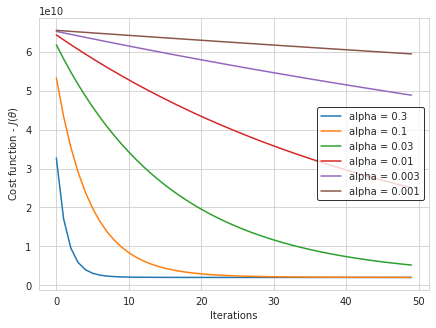

In [21]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 50) 
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

Ta nhận thấy learning rate phù hợp nhất ở đây là __0.03__

## 5. Thực hiện dự đoán 

In [22]:
# Chạy lại thuật toán với LR tối ưu = 0.03
gradient, thetaHist, cost = gradientDescent(X, y, theta, 0.03, 500)  

# normalizing parameters:
paramsNorm = (np.array([1650, 3]) - mean) / sigma

# thêm cột 1 vào paramsNorm
params = np.hstack((np.array([1]), paramsNorm))

# Dự đoán giá nhà
predict = np.dot(params, gradient)
print ('Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $%0.2f' % predict)

Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $293097.99


**Đầu ra kỳ vọng**: 
```python
Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $293097.99
```

## 6. Nghiệm bằng Normal Equation

Normal Equation là phương pháp tìm nghiệm của bài toán Linear Regression mà không cần tới vòng lặp, không cần lựa chọn Learning Rate. Và cũng không cần phải Scaling dữ liệu.

Và công thức quan trọng nhất của chúng ta:

<center> $\theta = (X^T X)^{-1} X^Ty $ </center>

So sánh giữa Normal Equation và Gradient Descent:

<table>
  <tr>
    <td> Gradient Descent </td>
    <td> Normal Equation </td>
  </tr>

  <tr>
    <td> Cần phải chọn Learning Rate </td>
    <td> Không cần chọn Learning Rate </td> 
  </tr>
  
  <tr>
    <td> Cần nhiều vòng lặp </td>
    <td> Không cần vòng lặp </td>
  </tr>
  
  <tr>
    <td> Thời gian tính: $O(kn^2)$ </td>
    <td> Thời gian tính: $O(n^3)$, cần phải tính ma trận nghịch đảo </td> 
  </tr>
  
   <tr>
    <td> Hoạt động tốt với dữ liệu lớn  </td>
    <td> Rất chậm với dữ liệu lớn </td> 
  </tr>
  
</table>

### Bài tập 5: Viết công thức nghiệm Normal Equation 

In [23]:
from numpy.linalg import inv

"""
Gợi ý sử dụng `inv` để tính ma trận nghịch đảo.
"""

# Định nghĩa hàm normal equation
def normalEqn(X, y):
    ### START CODE HERE ### (≈ 1 line of code) 
    theta = inv(X.T.dot(X)).dot(X.T).dot(y)
    ### END CODE HERE ###
    
    return theta

In [24]:
# Với Normal Equation ta cũng cần thêm vector cột 1 vào ma trận x
X = np.ones((len(x), 3))
X[:, 1:] = x

thetaN = normalEqn(X, y)

In [25]:
thetaN = normalEqn(X, y)
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(thetaN[0], thetaN[1], thetaN[2]))

theta[0]: 89597.90954279699
theta[1]: 139.21067401762542
theta[2]: -8738.019112327687


**Đầu ra kỳ vọng**: 
```python
theta[0]: 89597.90954279806
theta[1]: 139.21067401762548
theta[2]: -8738.019112327602
```

**Nhận xét:** Nghiệm bài toán khá sát với kết quả khi sử dụng thư viện __Scikit-learn__

In [26]:
# Dự đoán với căn nhà 1650 feet, 3 phòng ngủ 
params = np.array([1, 1650, 3]) 

predict = np.dot(params, thetaN)
print ('Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $%0.2f' % predict)

Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $293081.46


**Đầu ra kỳ vọng**: 
```python
Căn nhà diện tích 1650 feet và 3 phòng ngủ có giá: $293081.46
```

## Tổng kết

Thông qua hướng dẫn này, các bạn đã nắm vững các kiến thức về:

- Hồi quy tuyến tính đa biến
- Thực hiện tính toán trên các matrix / vector
- Đánh giá sự khác nhau giữa Gradient Descent và Normal Equation


Tài liệu tham khảo 

[1] [CS229 - Machine Leanring]()